In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

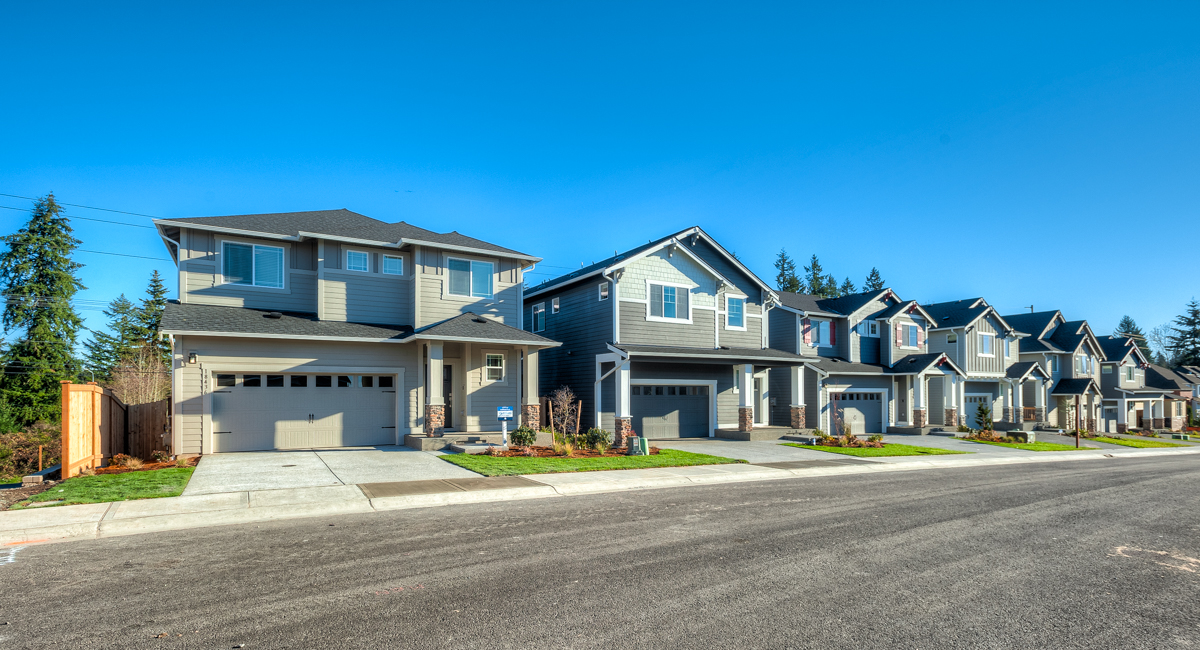

**Hello everyone, I hope you are well.
Today I will be conducting the analysis and forecasting of King County - Washington - US registration prices.
Before carrying out this deployment what is important to emphasize?
Many machine learning algorithms work best when numeric input variables are sized to a standard range. This includes algorithms that use a weighted sum of input, such as linear regression, and algorithms that use distance measures, such as knn. Input variables can have different units which, in turn, can mean input variables with different scales.

In the end if you liked it, give a positive vote, if you didn't like it, leave the comment.

Let's get started!**

**We import the main libraries.**

In [ ]:
#import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

**Bellow, a fuction to resize our plots**

In [ ]:
def resizeplot(l,a):
    plt.figure(figsize=(l,a))

In [ ]:
df = pd.read_csv('../input/kc-house-data/kc_house_data.csv')

In [ ]:
df.head()

**Let's drop the 'id' column. Not important for our work here.**

In [ ]:
df.drop('id',inplace=True,axis=1)

**Let's see with what we're dealing with.**

In [ ]:
df.info()

**Now, I'll transform the 'date' column in a usefull column, spliting it in a Year column and Month column.**

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['Month'] = df['date'].apply(lambda date: date.month)
df['Year'] = df['date'].apply(lambda date: date.year)

**Let's see the result.**

In [ ]:
df.head()

**If you notice, there's a numbers in the columns 'bathrooms' and 'floors' indicating a float numbers.
Let's turn them on integers.**

In [ ]:
df['bathrooms'] = np.round(df['bathrooms'])
df['floors'] = np.round(df['floors'])

**There is some null data?**

In [ ]:
df.isnull().sum()

**Yes, just two.let's clean it.**

In [ ]:
df.dropna(inplace=True)

**Let's drop de 'date column as I mentioned before.**

In [ ]:
df.drop('date',inplace=True,axis=1)

In [ ]:
df.isnull().sum()

**Starting the visualizations with distplot we can see a density of the Price but if you notice we can see a little bit outliers over 2 million.**

In [ ]:
resizeplot(10,6)
sns.histplot(df['price'],kde=True,bins=50)

**Bellow, some of a few correlated features.**

In [ ]:
resizeplot(16,7)
sns.heatmap(df.corr(),annot=True)

**Now, let's see how the price changed along the years.**

In [ ]:
resizeplot(10,6)
sns.scatterplot(x='yr_built',y='price',data=df,hue='view',palette = 'deep')

**As we can see bellow, there is a much more residences without a View than the others.**

In [ ]:
resizeplot(10,5)
sns.countplot(x='view',data=df)

**..and much less waterfront houses.**

In [ ]:
resizeplot(9,5)
sns.countplot(x='waterfront',data=df)

**A linear analysis showing us the increase of the price along the years.**

In [ ]:
resizeplot(10,6)
sns.lineplot(x='Year',y='price',data=df)

**And of course, the higher the grade the higher the price.
Note that, the price does not vary much between 2 and 6,
probably due to the similarity of the houses.**

In [ ]:
resizeplot(10,6)
sns.lineplot(x='grade',y='price',data=df,palette='terrain')

**Let's visualyze for another perspective.**

In [ ]:
resizeplot(10,6)
sns.boxplot(x='grade',y='price',data=df,showfliers=False)

In [ ]:
resizeplot(10,6)
sns.relplot(x='sqft_lot',y='price',data=df,palette='terrain')

**Now, let's do an analysis relating the number of rooms with a view to the price of the property.**

In [ ]:
print('Mean of 1 room with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==1)]['price'].mean())

In [ ]:
print('Mean of 1 room without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==1)]['price'].mean())

In [ ]:
print('Mean of 2 rooms with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==2)]['price'].mean())

In [ ]:
print('Mean of 2 rooms without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==2)]['price'].mean())

In [ ]:
print('Mean of 3 rooms with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==3)]['price'].mean())

In [ ]:
print('Mean of 3 rooms without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==3)]['price'].mean())

In [ ]:
print('Mean of 4 rooms with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==4)]['price'].mean())

In [ ]:
print('Mean of 4 rooms without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==4)]['price'].mean())

**Relating the number of bathrooms with the price.**

In [ ]:
resizeplot(10,6)
sns.boxplot(x='bathrooms',y='price',data=df)

**We can see that the residences have more houses with 3 and 4 bedrooms than the others, which leads us to realize that there are several other attributes that value the house and not just bedrooms and bathrooms.**

In [ ]:
resizeplot(10,6)
sns.countplot(x='bedrooms',data=df)

# Let's start creating our models

In [ ]:
df.info()

In [ ]:
X = df[['bedrooms','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].values
y = df['price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

**Normalize the data.**

In [ ]:
std = StandardScaler()

In [ ]:
X = std.fit_transform(X)

**#RANDOM FOREST REGRESSOR**

In [ ]:
rfr = RandomForestRegressor(n_estimators=200)

In [ ]:
rfr.fit(X_train,y_train)

In [ ]:
score_rfr = rfr.score(X_train,y_train)

In [ ]:
prev_rfr = rfr.predict(X_test)

In [ ]:
mae_rfr = mean_absolute_error(y_test,prev_rfr)

In [ ]:
mse_rfr = mean_squared_error(y_test,prev_rfr)

In [ ]:
rmse_rfr = np.sqrt(mean_squared_error(y_test,prev_rfr))

In [ ]:
print('Mae: ',mae_rfr)
print('Mse: ',mse_rfr)
print('Rmse: ',rmse_rfr)

In [ ]:
print(score_rfr)

In [ ]:
preco_rfr = df['price']
predict_rfr = pd.Series(prev_rfr)
error_rfr = preco_rfr-predict_rfr
data_rfr = {'Price':preco_rfr,'Predictions':predict_rfr,'Error':error_rfr}
data_prev_rfr = pd.DataFrame(data_rfr)
data_prev_rfr.head()

In [ ]:
resizeplot(10,6)
plt.scatter(y_test,prev_rfr)
plt.plot(y_test,y_test,color='red')

**LINEAR REGRESSION**

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
pred_lr = lr.predict(X_test)

In [ ]:
score_lr = lr.score(X_train,y_train)

In [ ]:
print(score_lr)

In [ ]:
lr.coef_[0]

In [ ]:
lr.intercept_

In [ ]:
mae_lr = mean_absolute_error(y_test,pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)
rmse_lr = np.sqrt(mse_lr)

In [ ]:
print('Mae_lr: ',mae_lr)
print('Mse_lr: ',mse_lr)
print('Rmse_lr: ',rmse_lr)

In [ ]:
preco_lr = df['price']
predict_lr = pd.Series(pred_lr)
error_lr = preco_lr-predict_lr
data_lr = {'Price':preco_lr,'Predictions':predict_lr,'Error':error_lr}
data_prev_lr = pd.DataFrame(data_lr)
data_prev_lr.head()

In [ ]:
resizeplot(10,6)
plt.scatter(y_test,pred_lr)
plt.plot(y_test,y_test,color='red')

**POLYNOMIAL REGRESSION**

In [ ]:
poly = PolynomialFeatures(degree=4)

In [ ]:
X_train_poly = poly.fit_transform(X_train)

In [ ]:
X_test_poly = poly.transform(X_test)

In [ ]:
lr.fit(X_train_poly,y_train)

In [ ]:
score_poly = lr.score(X_train_poly,y_train)

In [ ]:
print(score_poly)

In [ ]:
pred_poly = lr.predict(X_test_poly)

In [ ]:
pred_poly[0]

In [ ]:
mae_poly = mean_absolute_error(y_test,pred_poly)
mse_poly = mean_squared_error(y_test,pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test,pred_poly))

In [ ]:
print('Mae_poly:',mae_poly)
print('Mse_poly:',mse_poly)
print('Rmse_poly:',rmse_poly)

**DECISION TREE REGRESSOR**

In [ ]:
dtr = DecisionTreeRegressor(random_state=0)

In [ ]:
dtr.fit(X_train,y_train)

In [ ]:
pred_dtr = dtr.predict(X_test)

In [ ]:
score_dtr = dtr.score(X_train,y_train)

In [ ]:
print(score_dtr)

In [ ]:
mae_dtr = mean_absolute_error(y_test,pred_dtr)
mse_dtr = mean_squared_error(y_test,pred_dtr)
rmse_dtr = np.sqrt(mse_dtr)

In [ ]:
print('Mae_dtr: ',mae_dtr)
print('Mse_dtr: ',mse_dtr)
print('Rmse_dtr: ',rmse_dtr)

In [ ]:
price_dtr = df['price']
predict_dtr = pd.Series(pred_dtr)
error_dtr = price_dtr-predict_dtr
data_dtr = {'Price':price_dtr,'Predictions':predict_dtr,'Error':error_dtr}
data_prev_dtr = pd.DataFrame(data_dtr)
data_prev_dtr.head()

In [ ]:
data_prev_dtr['Percentage_error'] = np.abs(data_prev_dtr['Error'])*100/data_prev_dtr['Price']

In [ ]:
data_prev_dtr.head()

In [ ]:
resizeplot(10,6)
plt.scatter(y_test,pred_dtr)
plt.plot(y_test,y_test,color='red')

> **KNN REGRESSOR**

In [ ]:
knr = KNeighborsRegressor(n_neighbors = 10)

In [ ]:
knr.fit(X_train,y_train)

In [ ]:
score_knr = knr.score(X_train,y_train)

In [ ]:
print(score_knr)

In [ ]:
pred_knr = knr.predict(X_test)

In [ ]:
mae_knr = mean_absolute_error(y_test,pred_knr)
mse_knr = mean_squared_error(y_test,pred_knr)
rmse_knr = np.sqrt(mse_knr)

In [ ]:
print('Mae_knr: ',mae_knr)
print('Mse_knr: ',mse_knr)
print('Rmse_knr: ',rmse_knr)

In [ ]:
price_knr = df['price']
predict_knr = pd.Series(pred_knr)
error_knr = price_dtr-predict_knr
data_knr = {'Price':price_knr,'Predictions':predict_knr,'Error':error_knr}
data_prev_knr = pd.DataFrame(data_knr)
data_prev_knr.head()

In [ ]:
resizeplot(10,6)
plt.scatter(y_test,pred_knr)
plt.plot(y_test,y_test,color='red')

**XGBOOST**

In [ ]:
xgb = XGBRegressor()

In [ ]:
xgb.fit(X_train,y_train)

In [ ]:
pred_xgb = xgb.predict(X_test)

In [ ]:
score_xgb = xgb.score(X_train,y_train)

In [ ]:
print(score_xgb)

In [ ]:
mae_xgb = mean_absolute_error(y_test,pred_xgb)
mse_xgb = mean_squared_error(y_test,pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test,pred_xgb))

In [ ]:
print('Mae_xgb: ',mae_xgb)
print('Mse_xgb: ',mse_xgb)
print('Rmse_xgb: ',rmse_xgb)

In [ ]:
price_xgb = df['price']
predict_xgb = pd.Series(pred_xgb)
error_xgb = price_xgb-predict_xgb
data_xgb = {'Price':price_xgb,'Predictions':predict_xgb,'Error':error_xgb}
data_prev_xgb = pd.DataFrame(data_xgb)
data_prev_xgb.head()

In [ ]:
resizeplot(10,6)
plt.scatter(y_test,pred_xgb)
plt.plot(y_test,y_test,color='red')

In [ ]:
print('Decision Tree Regressor: ',round(score_dtr,3), '->', 'Rmse_DTR: ',rmse_dtr)
print('Random Forrest Regressor: ', round(score_rfr,3), '->', 'Rmse_RFR: ',rmse_rfr)
print('XGBOOST Regressor: ', round(score_xgb,3),'Rmse_XGB:','->',rmse_xgb)
print('Polynomial Regressor: ', round(score_poly,3),'->','Rmse_POLY: ',rmse_poly)
print('Linear Regression: ', round(score_lr,3),'Rmse_LR: ','->',rmse_lr)
print('KNN Regressor: ', round(score_knr,3),'Rmse_KNN: ','->',rmse_knr)

**It is important to note that although Decision Tree gave us a 99% score, the Random Forest Regressor dos algorithm gave a lower score, 95%, however the mean square error was lower than Decision tree. In that case it will depend on what the analyst looks for in relation to the data and whether this average value will be and well above what he wants or enough enough for the insight of his business.**


**Thats all for now guys,and be healthy and be safe.**